# 3 Maneras de Programar a una Red Neuronal

## Código inicial

In [4]:
pip install mlxtend --upgrade --no-deps

In [5]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow import keras as kr
tf.config.run_functions_eagerly(True)

Vamos a buscar separar ambos grupos, el tipo chiquito y el tipo grande (usando make_circles)

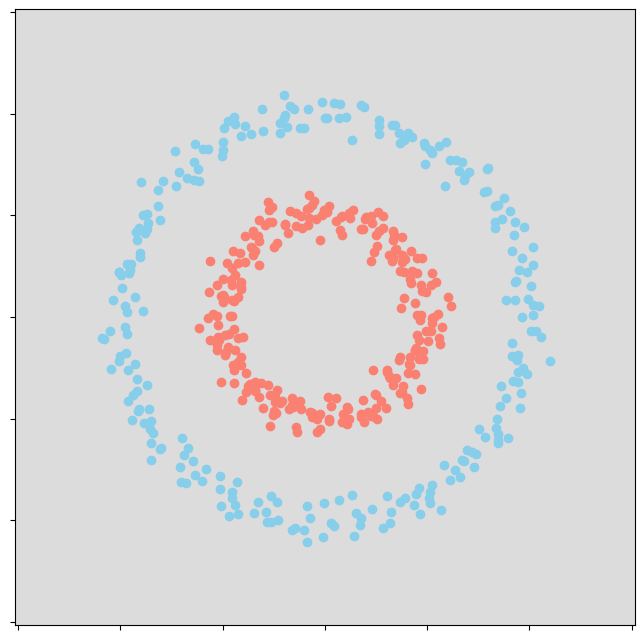

In [6]:
# Creamos nuestros datos artificiales, donde buscaremos clasificar
# dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)
#Mientras menor el noise, más juntitos los puntos
#Mientras mayor el factor, más juntos están los dos círculos distintos

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

## Tensorflow
### Es una librería de diferenciación automática que nos permite tener resueltas las derivadas parciales. Otra conocida y de mercado es Pytorch

Step 0/1000 - Loss = 0.4395 - Acc = 0.4720
Step 25/1000 - Loss = 0.4211 - Acc = 0.4340
Step 50/1000 - Loss = 0.3982 - Acc = 0.4500
Step 75/1000 - Loss = 0.3721 - Acc = 0.5360
Step 100/1000 - Loss = 0.3464 - Acc = 0.5660
Step 125/1000 - Loss = 0.3212 - Acc = 0.6040
Step 150/1000 - Loss = 0.2949 - Acc = 0.6400
Step 175/1000 - Loss = 0.2647 - Acc = 0.6660
Step 200/1000 - Loss = 0.2276 - Acc = 0.6940
Step 225/1000 - Loss = 0.1880 - Acc = 0.7180
Step 250/1000 - Loss = 0.1547 - Acc = 0.7600
Step 275/1000 - Loss = 0.1337 - Acc = 0.8120
Step 300/1000 - Loss = 0.1202 - Acc = 0.8380
Step 325/1000 - Loss = 0.1105 - Acc = 0.8500
Step 350/1000 - Loss = 0.1032 - Acc = 0.9000
Step 375/1000 - Loss = 0.0974 - Acc = 0.9460
Step 400/1000 - Loss = 0.0923 - Acc = 0.9640
Step 425/1000 - Loss = 0.0877 - Acc = 0.9740
Step 450/1000 - Loss = 0.0836 - Acc = 0.9800
Step 475/1000 - Loss = 0.0797 - Acc = 0.9860
Step 500/1000 - Loss = 0.0760 - Acc = 0.9940
Step 525/1000 - Loss = 0.0726 - Acc = 0.9940
Step 550/1000 -

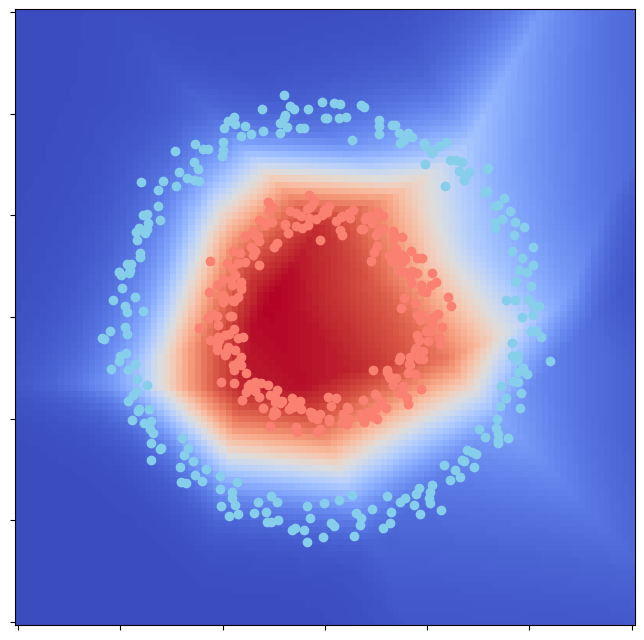

In [8]:
# Importamos el módulo de compatibilidad de TensorFlow 1 (TF1)
import tensorflow.compat.v1 as tf
# Deshabilitamos TODAS las funcionalidades de TensorFlow 2 (como la Eager Execution).
# Esto nos fuerza a usar el paradigma de Grafo y Sesión de TF1.
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# =================================================================================
# PASO 1: DEFINICIÓN DEL GRAFO COMPUTACIONAL
# En TF1, primero defines un "plano" o "blueprint" de todas las operaciones.
# Nada se calcula todavía, solo se define la estructura.
# =================================================================================

# 1.1 Entradas del Grafo (Placeholders)
# Un 'placeholder' es una promesa de que le daremos datos más tarde (en la sesión).
# 'None' permite que el número de filas (muestras) sea flexible.
iX = tf.placeholder('float', shape=[None, X.shape[1]], name="Entrada_X")
iY = tf.placeholder('float', shape=[None], name="Salida_Y_Real")

lr = 0.01
nn = [2, 16, 8, 1]

# 1.2 Parámetros del Modelo (Variables)
# A diferencia de los placeholders, las 'Variables' sí contienen datos. Son los
# parámetros que el modelo aprenderá (los pesos W y los sesgos b).
# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
# Operaciones de la capa 1: definimos la matemática explícitamente.
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3 (Capa de Salida)
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')
# La salida es un vector de predicciones. Usamos sigmoid para clasificación binaria.
# El '[:, 0]' es para convertir la salida de shape [N, 1] a [N,], un vector 1D.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

# 1.3 Función de Coste y Optimizador
# Definimos cómo mediremos el error y cómo lo minimizaremos.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos el optimizador. Este nodo, cuando se ejecute, realizará
# la retropropagación (backpropagation) y actualizará los pesos W y sesgos b.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)


# =================================================================================
# PASO 2: EJECUCIÓN DEL GRAFO EN UNA SESIÓN
# Ahora que el "plano" está listo, creamos una Sesión para "darle vida"
# y ejecutar las operaciones que definimos.
# =================================================================================

n_steps = 1000
iPY = [] # Guardaremos los fotogramas de la animación.

# 'with tf.Session() as sess:' crea el entorno de ejecución.
with tf.Session() as sess:

    # MUY IMPORTANTE: Inicializamos todas las 'Variables' (W1, b1, W2, etc.).
    sess.run(tf.global_variables_initializer())

    # Bucle de entrenamiento manual.
    for step in range(n_steps):

        # ---- LA LÍNEA MÁGICA DE TF1 ----
        # sess.run() es el comando para ejecutar nodos del grafo.
        # 1. Le pedimos que ejecute 'optimizer' (esto entrena la red).
        # 2. Le pedimos el valor de 'loss' y 'pY' para monitorear.
        # 3. Con 'feed_dict', alimentamos los 'placeholders' con nuestros datos reales X e Y.
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })

        # Cada 25 pasos, guardamos un fotograma para la animación.
        if step % 25 == 0:
            acc = np.mean(np.round(_pY) == Y)
            print(f'Step {step}/{n_steps} - Loss = {_loss:.4f} - Acc = {acc:.4f}')

            # Obtenemos las predicciones para la malla de visualización.
            # No ejecutamos 'optimizer' aquí, solo queremos predecir.
            frame_pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))
            iPY.append(frame_pY)

# =================================================================================
# PASO 3: ANIMACIÓN (Este código es de Matplotlib, no de TensorFlow)
# =================================================================================

ims = []
fig = plt.figure(figsize=(8, 8))
print("\n--- Generando animación ---")

for fr in range(len(iPY)):
    im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
    plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
    plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")
    plt.tick_params(labelbottom=False, labelleft=False)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())

## Keras
### Maneja en forma simplificada la composición de Capas. Veremos a las redes neuronales artificiales como combinaciones de capas

Epoch 1/250
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc: 0.4062 - loss: 0.7051

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.5104 - loss: 0.7077
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - acc: 0.4949 - loss: 0.7082
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - acc: 0.5036 - loss: 0.7068
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - acc: 0.4886 - loss: 0.7065
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.4683 - loss: 0.7053
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.5047 - loss: 0.7014
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.4781 - loss: 0.7013
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.4634 - loss: 0.7012
Epoch 9/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.4432 - loss: 0.7011
Epoch 10/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.4743 - loss: 0.6981
Epoch 11/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.4694 - loss: 0.6980
Epoch 12/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.4623 - loss: 0.6965
Epoch 13/250
16/16 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


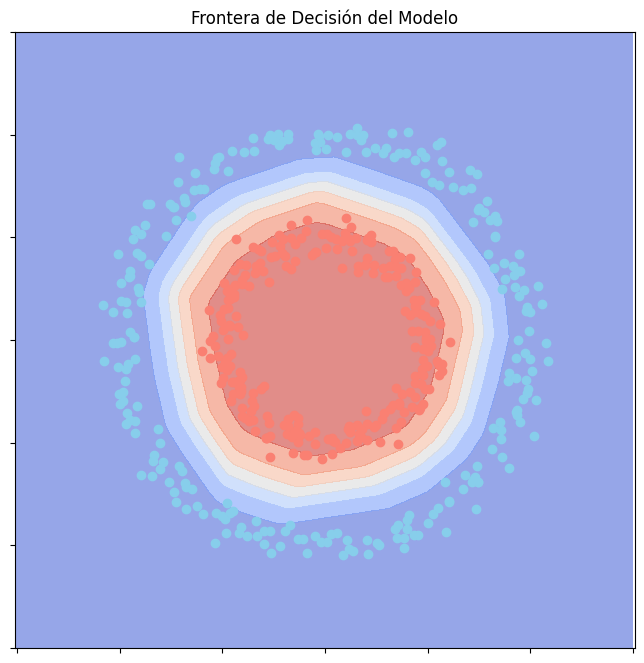

In [6]:
import tensorflow as tf
from tensorflow import keras as kr

lr = 0.01           # Tasa de aprendizaje (learning rate)
nn = [2, 16, 8, 1]  # Neuronas por capa: [entrada, oculta1, oculta2, salida]

# Creamos el modelo secuencial de Keras.
model = kr.Sequential()

# Añadimos las capas. Es una buena práctica definir 'input_shape' en la primera capa.
model.add(kr.layers.Dense(nn[1], activation='relu', input_shape=(nn[0],)))
model.add(kr.layers.Dense(nn[2], activation='relu'))
model.add(kr.layers.Dense(nn[3], activation='sigmoid')) # Sigmoid para clasificación binaria

# Compilamos el modelo.
# Usamos 'binary_crossentropy' que es la función de coste estándar y más efectiva
# para problemas de clasificación binaria.
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr), metrics=['acc'])

# Entrenamos al modelo.
# Keras maneja internamente la conversión de Y, pero asegurarse que sea float32 es seguro.
model.fit(X, Y.astype('float32'), epochs=250, verbose=1) # verbose=0 para no imprimir el log de cada época

# ---------------------------------------------------------------------------
# 5. PREDICCIÓN Y VISUALIZACIÓN DE RESULTADOS

# pasamos toda la malla _pX de una sola vez. Esto es muchísimo más rápido.
predictions = model.predict(_pX)

# Reorganizamos el vector de predicciones para que coincida con la forma de la malla.
_pY = predictions.reshape((res, res))

# ---- Visualización Final ----
plt.figure(figsize=(8, 8))
plt.title("Frontera de Decisión del Modelo")

# Dibujamos el fondo de color según la predicción del modelo en cada punto de la malla.
# Usamos contourf que es ideal para este tipo de visualización.
plt.contourf(_x0, _x1, _pY, cmap="coolwarm", alpha=0.6)

# Dibujamos los puntos de datos originales encima.
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

plt.axis("equal")
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

## Sklearn
### Trabajamos directamente sobre el modelo completo de una RNA

Entrenando el modelo de Scikit-learn...
Iteration 1, loss = 0.71703589
Iteration 2, loss = 0.65970646
Iteration 3, loss = 0.62453605
Iteration 4, loss = 0.59499574
Iteration 5, loss = 0.56845849
Iteration 6, loss = 0.54232384
Iteration 7, loss = 0.51338469
Iteration 8, loss = 0.47982140
Iteration 9, loss = 0.44292391
Iteration 10, loss = 0.40408143
Iteration 11, loss = 0.36377209
Iteration 12, loss = 0.32660392
Iteration 13, loss = 0.29268000
Iteration 14, loss = 0.26065738
Iteration 15, loss = 0.23111486
Iteration 16, loss = 0.20445044
Iteration 17, loss = 0.18067970
Iteration 18, loss = 0.16037974
Iteration 19, loss = 0.14284503
Iteration 20, loss = 0.12720163
Iteration 21, loss = 0.11322757
Iteration 22, loss = 0.10143513
Iteration 23, loss = 0.09138778
Iteration 24, loss = 0.08257195
Iteration 25, loss = 0.07521815
Iteration 26, loss = 0.06861015
Iteration 27, loss = 0.06275026
Iteration 28, loss = 0.05797792
Iteration 29, loss = 0.05371746
Iteration 30, loss = 0.05008171
Iteration

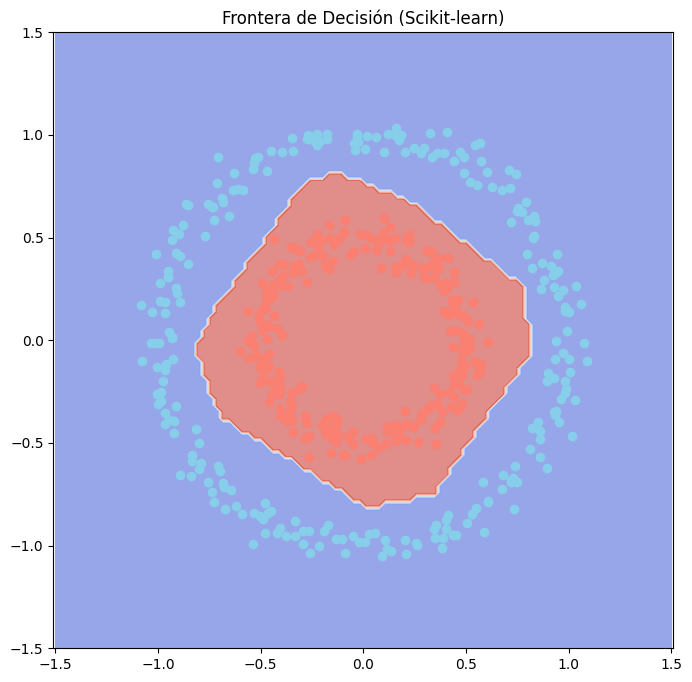

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.neural_network

# Parámetros que queremos para nuestra red.
lr = 0.05           # Tasa de aprendizaje.
nn = [2, 8, 1]      # Capas: [entrada, oculta, salida].

# Creamos el objeto del modelo de red neuronal de Scikit-learn (MLPClassifier).
# Ahora SÍ usamos los parámetros que definimos:
clf = sk.neural_network.MLPClassifier(
    # hidden_layer_sizes: Define la arquitectura de las capas ocultas.
    # Para nn = [2, 8, 1], solo tenemos una capa oculta de 8 neuronas.
    # Scikit-learn infiere las capas de entrada y salida automáticamente.
    hidden_layer_sizes=(nn[1],), # Debe ser una tupla -> (8,)

    # learning_rate_init: Es la tasa de aprendizaje inicial.
    learning_rate_init=lr,

    # Otros parámetros útiles:
    activation='relu',      # Función de activación (relu es un buen default).
    max_iter=1000,          # Aumentamos las épocas para asegurar que converja.
    verbose=True          # Lo ponemos en False para no tener un log tan largo.
)


# Entrenamos el modelo con nuestros datos. La sintaxis es muy directa.
print("Entrenando el modelo de Scikit-learn...")
clf.fit(X, Y)
print("Entrenamiento finalizado.")


# Pasamos toda la malla de puntos _pX de una sola vez para una predicción rápida.
predictions = clf.predict(_pX)

# Reorganizamos el resultado para que coincida con la forma de la malla.
_pY = predictions.reshape((res, res))

# ---- Visualización Final ----
plt.figure(figsize=(8, 8))
plt.title("Frontera de Decisión (Scikit-learn)")

# Usamos contourf para una mejor visualización de la frontera.
plt.contourf(_x0, _x1, _pY, cmap="coolwarm", alpha=0.6)

# Dibujamos los puntos de datos originales.
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

plt.axis("equal")
plt.show()